# Darshan Pradhan 

### DSC540 Project ML

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

### Project Description

For this project, I found a public dataset on [Kaggle.com](https://www.kaggle.com/) on Car Insurrance Data owned by Sagnik Roy. It was created on 2021-07-05.

URL for dataset: [Car Insurance Data](https://www.kaggle.com/sagnik1511/car-insurance-data)

The company has shared its annual car insurance data. Now, it is time to find out the real customer behaviors over the data.

The Columns represent the features in the practical world and they are as follows:
* ID: The id ranges from 101 to 1000k.
* AGE: The age groups("16-25","26-39","40-64","65+")
* GENDER: If they are Male or Female.
* RACE: If they are majority or minority.
* DRIVING_EXPERIENCE: The number of years driving("0-9y", "10-19y", "20-29y", "30y+")
* EDUCATION: The level of education received("None", "high school", "university")
* INCOME: In terms of class("Poverty", "working class", "middle class", "upper class")
* CREDIT_SCORE: The credit score ranges from 0.05 to 0.96.
* VEHICLE_OWNERSHIP: It indicates 1 if a customer has ownership of the vehicle else 0.
* VEHICLE_YEAR: There are vehicles before 2015 and after 2015.
* MARRIED: It indicates 1 if a customer is married else 0.
* CHILDREN: It indicates 1 if a customer has children else 0.
* POSTAL_CODE
* ANNUAL_MILEAGE: It range from 2k to 22k.
* VEHICLE_TYPE: There are two types("sedan", "sports car")
* SPEEDING_VIOLATIONS: They range from 0 to 22.
* DUIS: Number of DUIs range from 0 to 6.
* PAST_ACCIDENTS: It ranges from 0 to 15.
* OUTCOME: It indicates 1 if a customer has claimed his/her loan else 0.

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics

sklearn.__version__

'1.0.2'

## Getting the Data

**Use pandas to read Car_Insurance_Claim.csv as a dataframe called cars.**

In [2]:
cars = pd.read_csv('Car_Insurance_Claim.csv')

In [3]:
cars.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

There are 10,000 entries and 19 features.

In [5]:
cars['OUTCOME'].value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

In [6]:
cars.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


## Cleaning Data

**Checking for missing values.**

In [7]:
cars.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

There are missing values in Credit Score and Annual Mileage.

In [8]:
df=cars
df['CREDIT_SCORE'] = cars['CREDIT_SCORE'].fillna(cars['CREDIT_SCORE'].mean()) 
df['ANNUAL_MILEAGE'] = cars['ANNUAL_MILEAGE'].fillna(cars['ANNUAL_MILEAGE'].mean()) 

## Exploratory Data Analysis

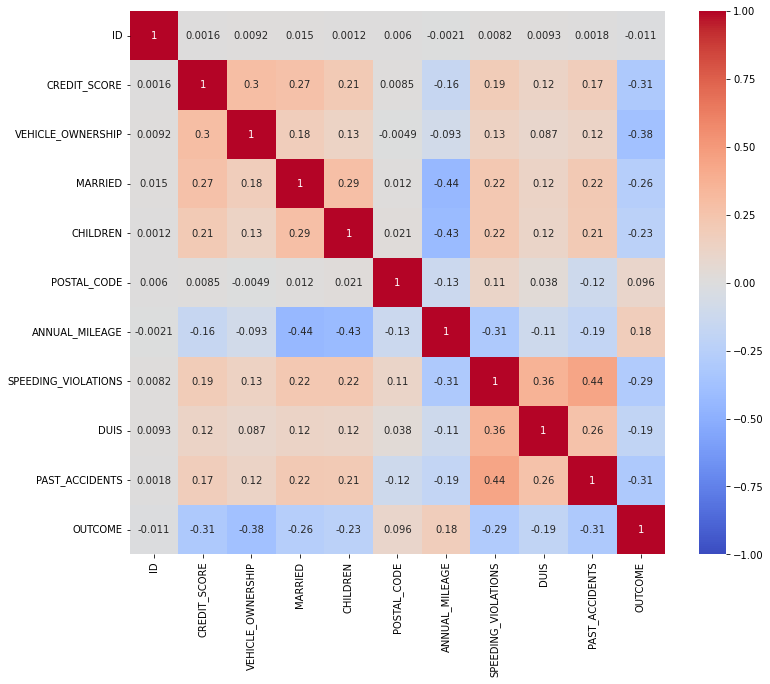

In [9]:
#Correlation HeatMap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='coolwarm',annot=True);

The features are not highly correlated.

<AxesSubplot:xlabel='OUTCOME', ylabel='count'>

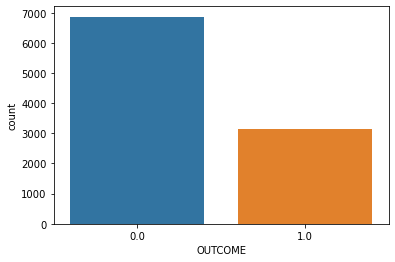

In [10]:
sns.countplot(data=df, x='OUTCOME')

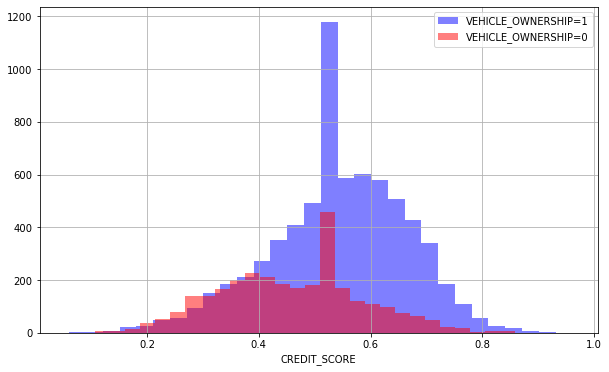

In [11]:
plt.figure(figsize=(10,6))
df[df['VEHICLE_OWNERSHIP']==1]['CREDIT_SCORE'].hist(alpha=0.5,color='blue',
                                              bins=30,label='VEHICLE_OWNERSHIP=1')
df[df['VEHICLE_OWNERSHIP']==0]['CREDIT_SCORE'].hist(alpha=0.5,color='red',
                                              bins=30,label='VEHICLE_OWNERSHIP=0')
plt.legend()
plt.xlabel('CREDIT_SCORE');

<Figure size 792x504 with 0 Axes>

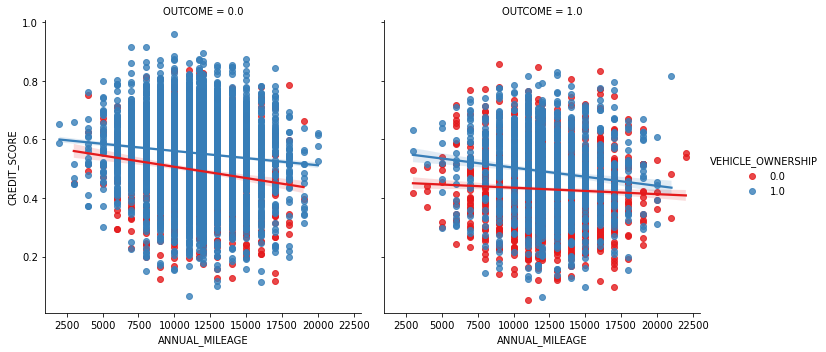

In [12]:
plt.figure(figsize=(11,7))
sns.lmplot(y = "CREDIT_SCORE", x = "ANNUAL_MILEAGE", hue='VEHICLE_OWNERSHIP', col='OUTCOME', data = df , palette='Set1');

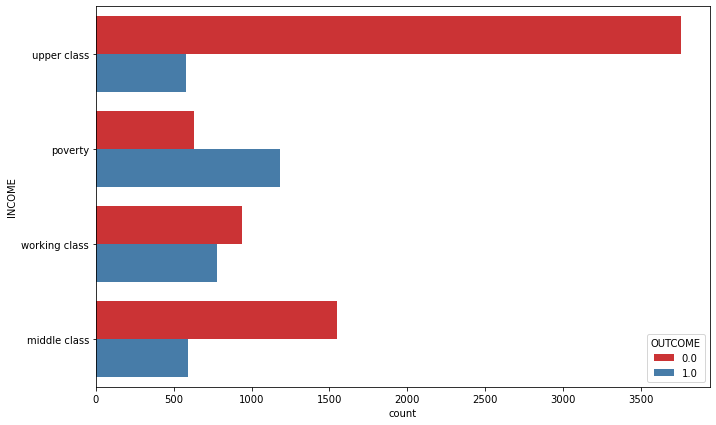

In [13]:
plt.figure(figsize=(11,7))
sns.countplot(y='INCOME', hue='OUTCOME', data=df, palette='Set1');

<AxesSubplot:xlabel='DRIVING_EXPERIENCE', ylabel='SPEEDING_VIOLATIONS'>

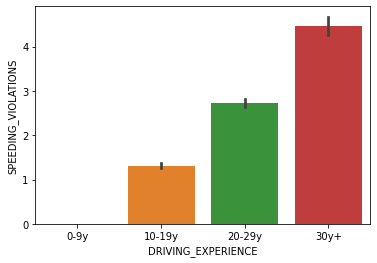

In [14]:
sns.barplot(data=df, x='DRIVING_EXPERIENCE', y='SPEEDING_VIOLATIONS')

<AxesSubplot:xlabel='AGE', ylabel='CREDIT_SCORE'>

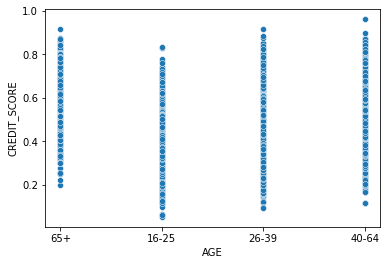

In [15]:
sns.scatterplot(data=df, x='AGE', y='CREDIT_SCORE')

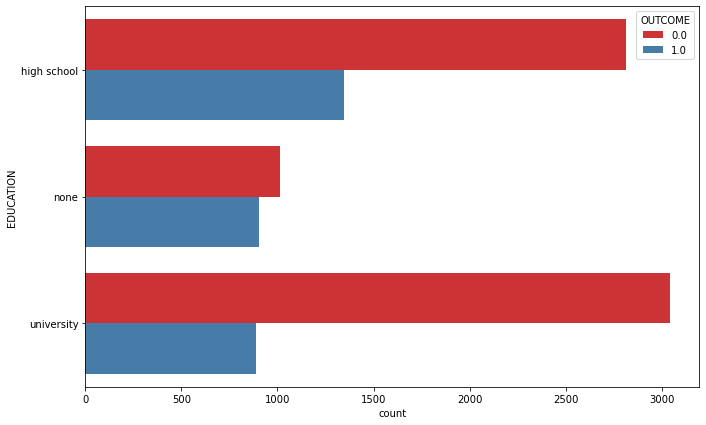

In [16]:
plt.figure(figsize=(11,7))
sns.countplot(y='EDUCATION', hue='OUTCOME', data=df, palette='Set1');

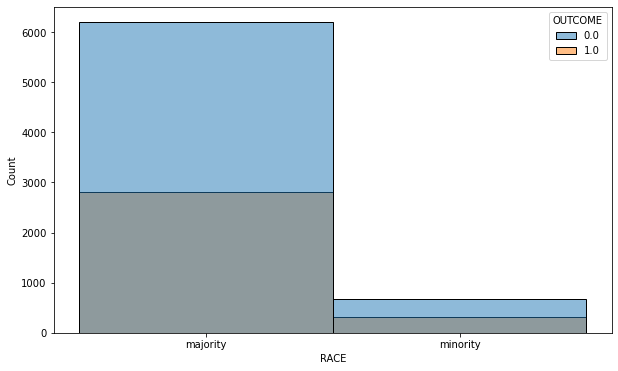

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(x = "RACE", hue = "OUTCOME", data = df, kde=False, bins=30);

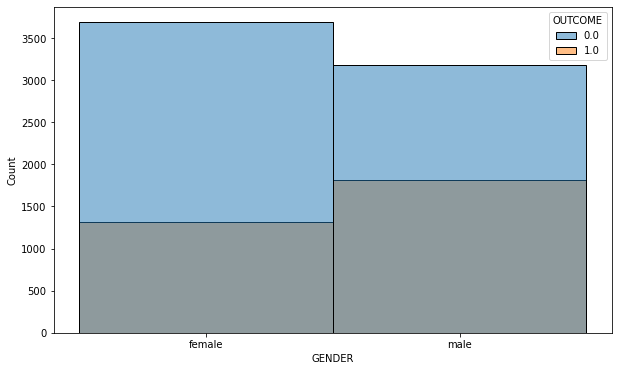

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(x = "GENDER", hue = "OUTCOME", data = df, kde=False, bins=30);

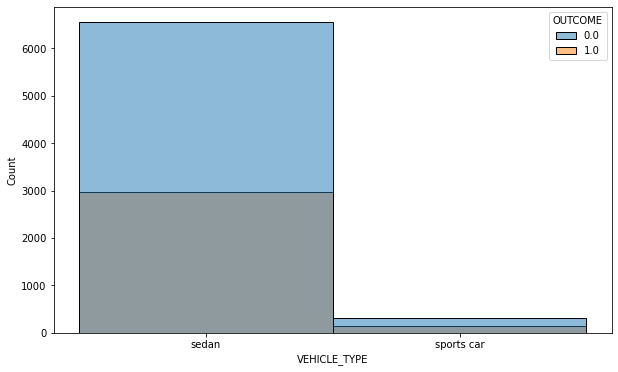

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(x = "VEHICLE_TYPE", hue = "OUTCOME", data = df, kde=False, bins=30);

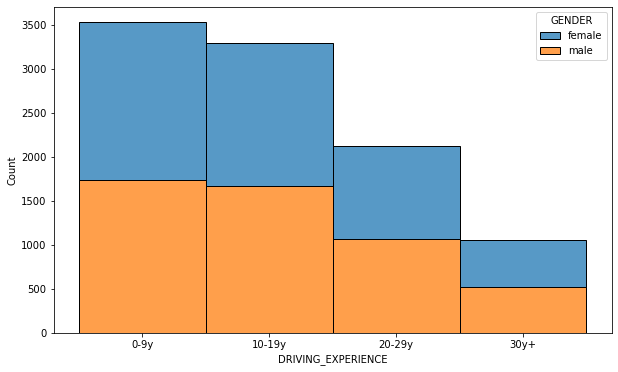

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(hue = "GENDER", x = "DRIVING_EXPERIENCE", data = df, multiple="stack");

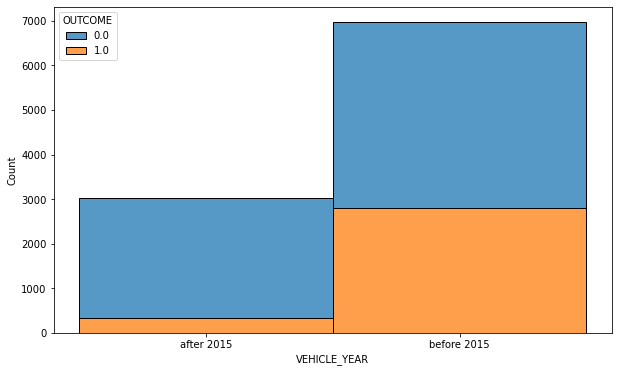

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(hue = "OUTCOME", x = "VEHICLE_YEAR", data = df, multiple="stack");

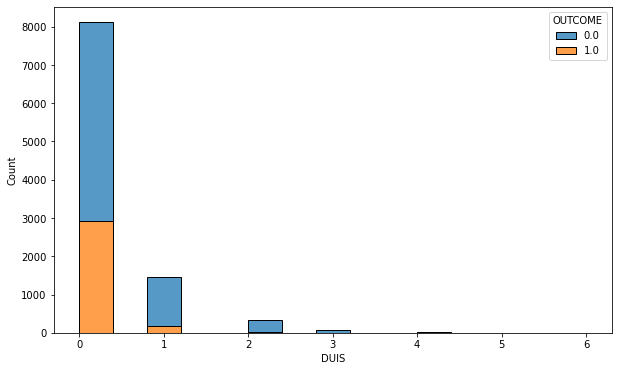

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(hue = "OUTCOME", x = "DUIS", data = df, multiple="stack");

<Figure size 792x504 with 0 Axes>

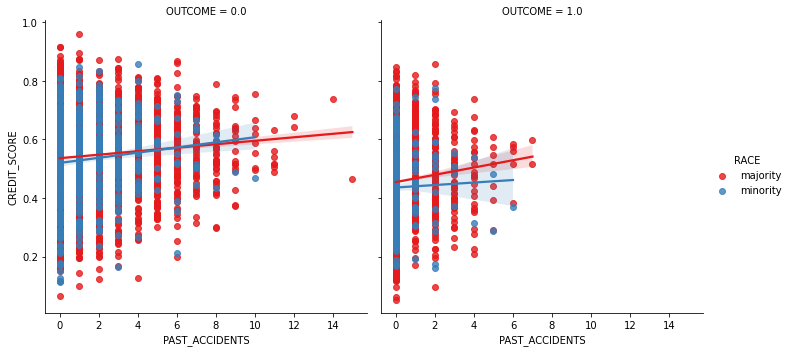

In [23]:
plt.figure(figsize=(11,7))
sns.lmplot(y='CREDIT_SCORE', x='PAST_ACCIDENTS', data=df, hue='RACE',
           col='OUTCOME', palette='Set1');

## Data Preprocessing 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         10000 non-null  float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       10000 non-null  float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [25]:
df.tail()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.000000,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,11697.003207,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.000000,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.000000,sedan,2,0,1,1.0
9999,442696,26-39,female,majority,0-9y,none,working class,0.435225,1.0,before 2015,1.0,1.0,10238,13000.000000,sedan,0,0,0,0.0


In [26]:
#dropping ID, VEHICLE_TYPE and POSTAL_CODE as they are not significant.
df2=df.drop(['ID','POSTAL_CODE','VEHICLE_TYPE'], axis=1)

In [27]:
df2.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,12000.0,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,16000.0,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,11000.0,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,11000.0,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,12000.0,2,0,1,1.0


In [28]:
#Addressing the categorical variables
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df3=df2
df3 = df3.apply(enc.fit_transform)

In [29]:
df3.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,0,0,0,0,2,7013,1,0,0,1,11,0,0,0,0
1,0,1,0,0,1,1,1290,0,1,0,0,15,0,0,0,1
2,0,0,0,0,0,3,3755,1,1,0,0,9,0,0,0,0
3,0,1,0,0,2,3,112,1,1,0,1,9,0,0,0,0
4,1,1,0,1,1,3,1756,1,1,0,0,11,2,0,1,1


In [30]:
df3.describe()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,1.489500,0.499000,0.098800,1.069300,0.97710,1.562200,4488.006600,0.697000,0.696700,0.498200,0.688800,10.197500,1.482700,0.23920,1.056100,0.313300
std,1.025278,0.500024,0.298408,0.990452,0.89892,1.008084,2473.503567,0.459578,0.459707,0.500022,0.463008,3.076596,2.240224,0.55499,1.650886,0.463858
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,2499.750000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.00000,2.000000,4295.000000,1.000000,1.000000,0.000000,1.000000,10.000000,0.000000,0.00000,0.000000,0.000000
75%,2.000000,1.000000,0.000000,2.000000,2.00000,2.000000,6518.250000,1.000000,1.000000,1.000000,1.000000,12.000000,2.000000,0.00000,2.000000,1.000000
max,3.000000,1.000000,1.000000,3.000000,2.00000,3.000000,9018.000000,1.000000,1.000000,1.000000,1.000000,21.000000,20.000000,6.00000,14.000000,1.000000


## Train Test Split

Now its time to split our data into a training set and a validation set!

The OUTCOME variable is the one that we will try to predict.

In [31]:
from sklearn.model_selection import train_test_split
RANDOM_STATE=42

In [32]:
X = df3.drop('OUTCOME',axis=1)
y = df3['OUTCOME']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=RANDOM_STATE)

<AxesSubplot:>

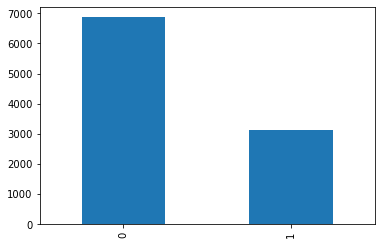

In [33]:
y.value_counts().plot(kind='bar')

There are mostly points from class 0. This is an imbalanced data. I suspect the algorithms will be mostly good in predicting class 0, but not so good in predicting in class 1.

## Decision Tree Model

In [34]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [35]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

dt.fit(X_train,y_train)

#Accuracy Train
pred_train = dt.predict(X_train)
print("Accuracy Score (Train): ", metrics.accuracy_score(y_true = y_train, y_pred = pred_train))

#Accuracy Val
pred = dt.predict(X_val)
print("Accuracy Score (Val): ", metrics.accuracy_score(y_true = y_val, y_pred = pred))

Accuracy Score (Train):  0.9995714285714286
Accuracy Score (Val):  0.767


There is a big gap which signifies overfitting.

In [36]:
print(metrics.classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      2063
           1       0.62      0.65      0.64       937

    accuracy                           0.77      3000
   macro avg       0.73      0.74      0.73      3000
weighted avg       0.77      0.77      0.77      3000



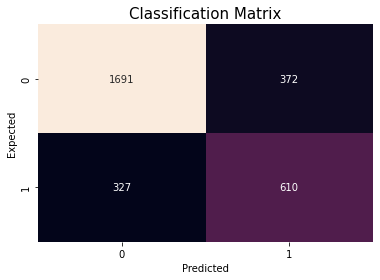

In [37]:
#Confusion_Matrix
confusion_matrix =  pd.crosstab(index = y_val, columns=pred.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Classification Matrix", fontsize = 15)
plt.show()

In [38]:
def fun_print_scores(fitted_estimator, X, y_true):
    '''
    Takes as input fitted model, X, and target labels.
    Prints scores
    '''
    y_pred = fitted_estimator.predict(X)
    print("Accuracy.....: {:.3f}".format(metrics.accuracy_score(y_true, y_pred)))
    print("Bal. Accuracy: {:.3f}".format(metrics.balanced_accuracy_score(y_true, y_pred)))
    print("F-1 Score....: {:.3f}".format(metrics.f1_score(y_true, y_pred, average="binary")))
    print("Recall.......: {:.3f}".format(metrics.recall_score(y_true, y_pred, pos_label=1)))
    print("Precision....: {:.3f}".format(metrics.precision_score(y_true, y_pred, pos_label=1)))
    print("Specificity..: {:.3f}".format(metrics.recall_score(y_true, y_pred, pos_label=0)))
    
    metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize='all')

Accuracy.....: 0.767
Bal. Accuracy: 0.735
F-1 Score....: 0.636
Recall.......: 0.651
Precision....: 0.621
Specificity..: 0.820


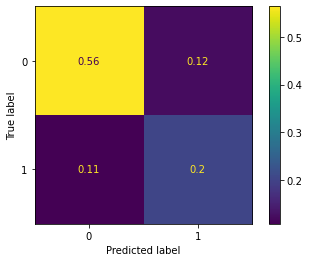

In [39]:
fun_print_scores(dt, X_val, y_val)

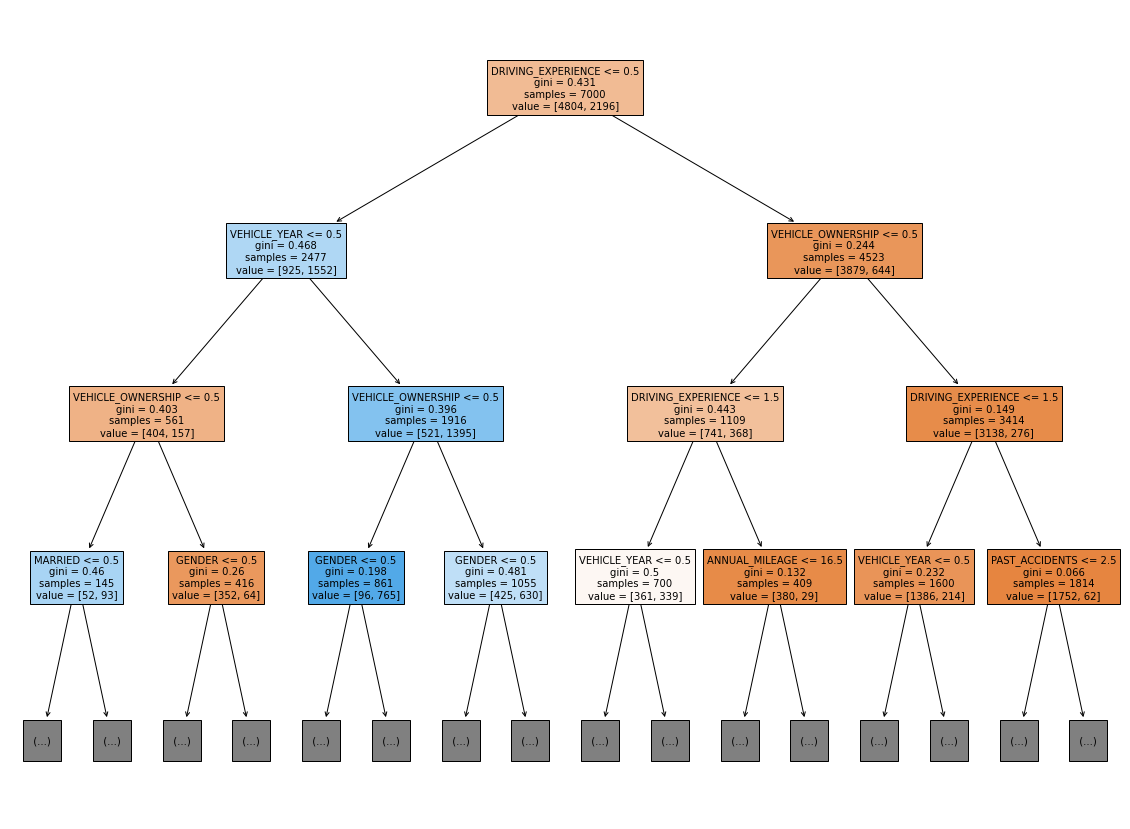

In [40]:
plt.figure(figsize=(20,15))
plot_tree(dt, max_depth=3, feature_names=X.columns, fontsize=10, filled=True);

In [41]:
from sklearn import model_selection

In [42]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [43]:
min_samples_splits = [10, 20, 50, 100, 200, 300]
max_depths = [2,4,5,10,15]
params = {"min_samples_split": min_samples_splits,
         "max_depth": max_depths}
grid = model_selection.GridSearchCV(estimator=dt, param_grid=params, scoring="accuracy")
grid

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 5, 10, 15],
                         'min_samples_split': [10, 20, 50, 100, 200, 300]},
             scoring='accuracy')

In [44]:
grid.fit(X_train, y_train)
grid.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

Accuracy.....: 0.842
Bal. Accuracy: 0.809
F-1 Score....: 0.740
Recall.......: 0.721
Precision....: 0.760
Specificity..: 0.896


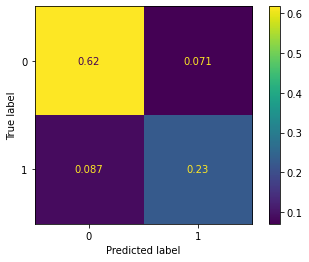

In [45]:
fun_print_scores(grid.best_estimator_, X_val, y_val)

## Random Forest model 

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier(random_state=RANDOM_STATE)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy.....: 0.999
Bal. Accuracy: 0.999
F-1 Score....: 0.999
Recall.......: 0.999
Precision....: 0.999
Specificity..: 1.000


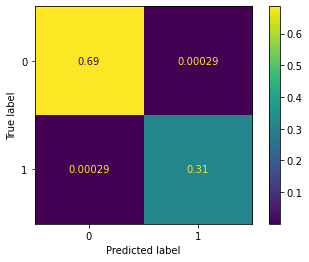

In [48]:
fun_print_scores(rf, X_train, y_train)

There is lot of overfitting.

Accuracy.....: 0.828
Bal. Accuracy: 0.786
F-1 Score....: 0.709
Recall.......: 0.672
Precision....: 0.751
Specificity..: 0.899


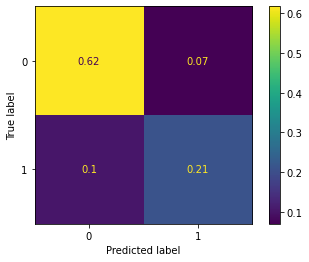

In [49]:
fun_print_scores(rf, X_val, y_val)

In [50]:
rf = RandomForestClassifier(random_state=RANDOM_STATE, class_weight="balanced_subsample")
params = {}
min_samples_splits = [20, 50, 100]
max_depths = [5,10,15]
n_estimators = [100, 500, 1000]
params = {
    "min_samples_split": min_samples_splits,
    "max_depth": max_depths, 
    "n_estimators": n_estimators
         }

In [51]:
grid = model_selection.GridSearchCV(estimator=rf, param_grid=params, scoring="accuracy", n_jobs=-1, cv=3)
grid

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [20, 50, 100],
                         'n_estimators': [100, 500, 1000]},
             scoring='accuracy')

In [52]:
grid.fit(X_train, y_train)
grid.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       min_samples_split=20, n_estimators=1000,
                       random_state=42)

Accuracy.....: 0.831
Bal. Accuracy: 0.827
F-1 Score....: 0.751
Recall.......: 0.818
Precision....: 0.695
Specificity..: 0.837


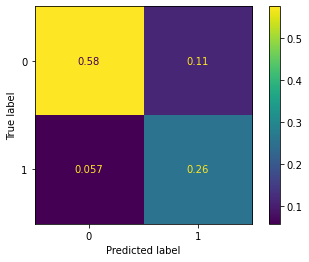

In [53]:
fun_print_scores(grid.best_estimator_, X_val, y_val)

## Adaboost model 

In [54]:
from sklearn.ensemble import AdaBoostClassifier

In [55]:
ada = AdaBoostClassifier(random_state=RANDOM_STATE)
ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

Accuracy.....: 0.842
Bal. Accuracy: 0.809
F-1 Score....: 0.742
Recall.......: 0.722
Precision....: 0.762
Specificity..: 0.897


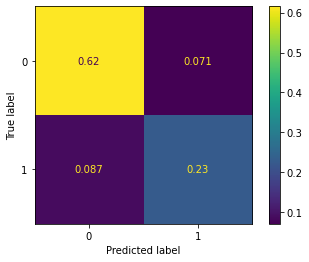

In [56]:
fun_print_scores(ada, X_train, y_train)

Accuracy.....: 0.840
Bal. Accuracy: 0.805
F-1 Score....: 0.735
Recall.......: 0.713
Precision....: 0.759
Specificity..: 0.897


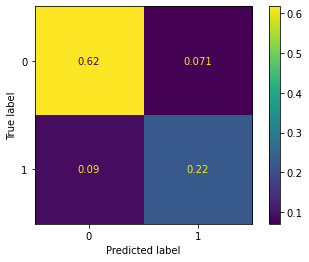

In [57]:
fun_print_scores(ada, X_val, y_val)

In [58]:
ada = AdaBoostClassifier(random_state=RANDOM_STATE)
params = {}
learning_rate = [0.05, 0.1, 0.2]
n_estimators = [100, 500, 1000]
params = {
    "learning_rate": learning_rate,
    "n_estimators": n_estimators
         }

In [59]:
grid = model_selection.GridSearchCV(estimator=ada, param_grid=params, scoring="accuracy", n_jobs=-1)
grid

GridSearchCV(estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'n_estimators': [100, 500, 1000]},
             scoring='accuracy')

In [60]:
grid.fit(X_train, y_train)
grid.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

Accuracy.....: 0.844
Bal. Accuracy: 0.806
F-1 Score....: 0.738
Recall.......: 0.705
Precision....: 0.774
Specificity..: 0.906


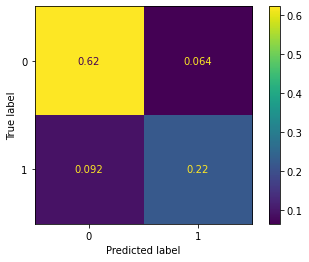

In [61]:
fun_print_scores(grid.best_estimator_, X_val, y_val)

## Gradient Boost model 

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
gb = GradientBoostingClassifier(random_state=RANDOM_STATE)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

Accuracy.....: 0.851
Bal. Accuracy: 0.820
F-1 Score....: 0.757
Recall.......: 0.738
Precision....: 0.777
Specificity..: 0.903


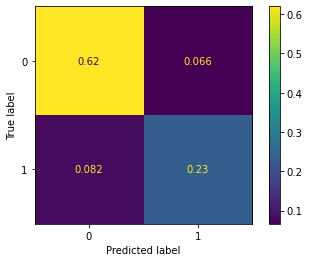

In [64]:
fun_print_scores(gb, X_train, y_train)

Accuracy.....: 0.844
Bal. Accuracy: 0.811
F-1 Score....: 0.743
Recall.......: 0.723
Precision....: 0.764
Specificity..: 0.899


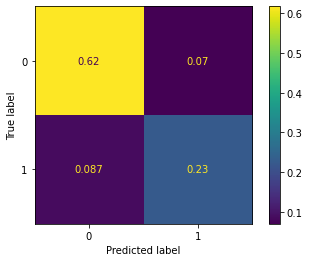

In [65]:
fun_print_scores(gb, X_val, y_val)

In [66]:
gb = GradientBoostingClassifier(random_state=RANDOM_STATE)
params = {}
learning_rate = [0.05, 0.1, 0.2]
n_estimators = [100, 500, 1000]
params = {
    "learning_rate": learning_rate,
    "n_estimators": n_estimators
         }

In [67]:
grid = model_selection.GridSearchCV(estimator=gb, param_grid=params, scoring="accuracy", n_jobs=-1)
grid

GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'n_estimators': [100, 500, 1000]},
             scoring='accuracy')

In [68]:
grid.fit(X_train, y_train)
grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, random_state=42)

Accuracy.....: 0.844
Bal. Accuracy: 0.811
F-1 Score....: 0.743
Recall.......: 0.721
Precision....: 0.766
Specificity..: 0.900


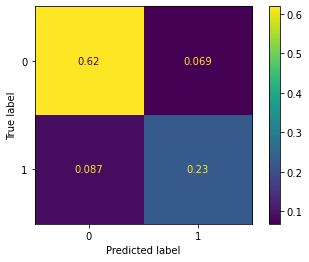

In [69]:
fun_print_scores(grid.best_estimator_, X_val, y_val)

# Best Model

Looking at the performance and scores of different models, the best model for the car issurance claim dataset is Gradient Boost model.

In [70]:
gb2 = GradientBoostingClassifier(learning_rate=0.05, random_state=42)
gb2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, random_state=42)

Accuracy.....: 0.845
Bal. Accuracy: 0.814
F-1 Score....: 0.748
Recall.......: 0.730
Precision....: 0.767
Specificity..: 0.898


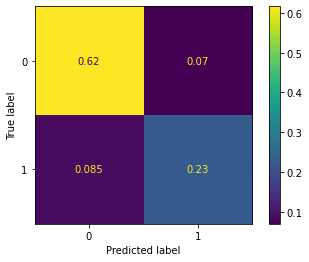

In [71]:
fun_print_scores(gb2, X_train, y_train)

Accuracy.....: 0.844
Bal. Accuracy: 0.811
F-1 Score....: 0.743
Recall.......: 0.721
Precision....: 0.766
Specificity..: 0.900


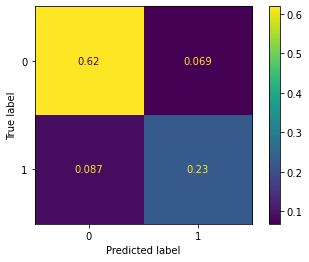

In [72]:
fun_print_scores(gb2, X_val, y_val)

Overall, Gradient Boost Model provided the best scores making it the most efficient model. 

# The End! 